In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from model.Linear_Reg_model import Linear_Regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
df = pd.read_csv('data/train.csv')
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [36]:
df.shape

(1460, 81)

In [37]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [39]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
X = df[features]
Y = df['SalePrice']

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (1168, 3), Test shape: (292, 3)


In [49]:
# Create and train the model
model = Linear_Regression(learning_rate=0.001, no_of_iterations=1000)
model.fit(X_train, Y_train)

In [50]:
predictions = model.predict(X_test)

# Show a few predictions
for actual, pred in zip(Y_test[:5], predictions[:5]):
    print(f"Actual: {actual}, Predicted: {round(pred, 2)}")

Actual: 154500, Predicted: 99311.02
Actual: 325000, Predicted: 252087.63
Actual: 115000, Predicted: 107367.13
Actual: 159000, Predicted: 182566.98
Actual: 315500, Predicted: 190332.82


In [51]:
mae = mean_absolute_error(Y_test, predictions)
rmse = np.sqrt(mean_squared_error(Y_test, predictions))

print(f"📊 MAE: {mae:.2f}")
print(f"📊 RMSE: {rmse:.2f}")

📊 MAE: 41616.06
📊 RMSE: 63118.37


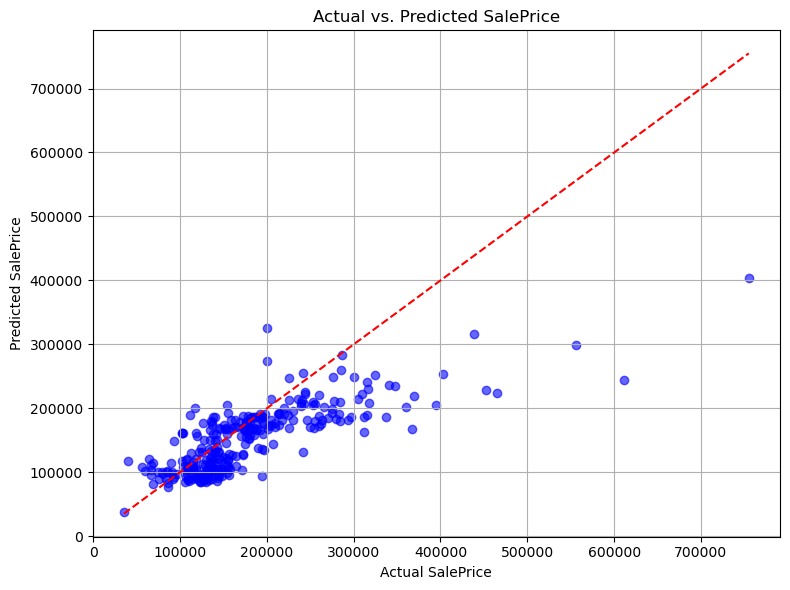

In [52]:
# Actual vs Predicted SalePrice
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, predictions, color='blue', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice')
plt.grid(True)
plt.tight_layout()
plt.show()